In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

### **Load Data**

In [2]:
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

x_train = train_data.drop(columns=['price'], axis=1)
y_train = train_data['price']

x_test = test_data.drop(columns=['price'], axis=1)
y_test = test_data['price']

# Check the shapes to ensure they match
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (575798, 13)
y_train shape: (575798,)
x_test shape: (143950, 13)
y_test shape: (143950,)


In [3]:
train_data.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2,price
0,0.066494,0.035211,0.035961,0.775135,0.870370,0.031026,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0,320000000.0
1,0.066494,0.035211,0.035961,0.171201,0.870370,0.009547,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0,475000000.0
2,0.066494,0.035211,0.035961,0.555670,0.629630,0.052506,0.128107,0.054767,0.370370,0.0,1.0,1.0,0.0,110000000.0
3,0.066494,0.035211,0.041719,0.171201,0.888889,0.007160,0.310353,0.054767,0.111111,1.0,0.0,1.0,0.0,475000000.0
4,0.066494,0.035211,0.041719,0.171201,0.981481,0.009547,0.310353,0.054767,0.018519,1.0,0.0,1.0,0.0,510000000.0


In [4]:
test_data.head()

,brand,model,type,color,year,mileage,province,region,age,transmission_1,transmission_2,condition_1,condition_2,price
0,0.066494,0.035211,0.041719,0.171201,0.870370,0.007160,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0,470000000.0
1,0.066494,0.035211,0.041719,0.171201,0.870370,0.004773,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0,450000000.0
2,0.066494,0.035211,0.041719,0.443989,0.870370,0.016706,0.310353,0.054767,0.129630,1.0,0.0,1.0,0.0,330000000.0
3,0.066494,0.035211,0.017442,0.171201,0.851852,0.007160,0.128107,0.054767,0.148148,1.0,0.0,1.0,0.0,445000000.0
4,0.066494,0.035211,0.017442,0.171201,0.851852,0.004773,0.310353,0.054767,0.148148,1.0,0.0,1.0,0.0,395000000.0


Text(0, 0.5, 'frequency')

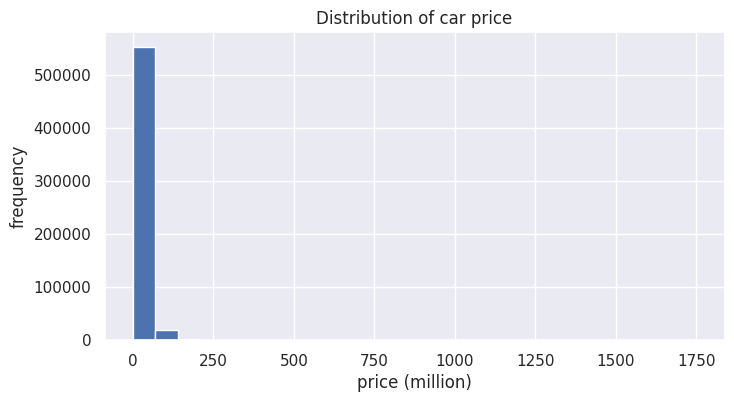

In [5]:
import matplotlib.pyplot as plt

train_data['price'].div(10000000).plot.hist(bins=25, figsize=(8,4))
plt.title('Distribution of car price')
plt.xlabel('price (million)')
plt.ylabel('frequency')

## **1. Linear Regression**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# predictions
# y_train_pred = model.predict(x_train)
y_predict = model.predict(x_test)

In [7]:
from sklearn import metrics

print("MAE data train:", metrics.mean_absolute_error(y_test,y_predict))
print("RMSE data train:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-squared train:", round(metrics.r2_score(y_test,y_predict),3))

MAE data train: 67866589.23245485
RMSE data train: 185623373.20924222
R-squared train: 0.739


### **Regplot for Linear Regression Output**

We would be using the seaborn's regplot to better understand how the data is spread. We see how the values are spread out and get a good understanding. We can understand from the plot that the predictions were very close to the actual values that we have considered. 

In [8]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [9]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

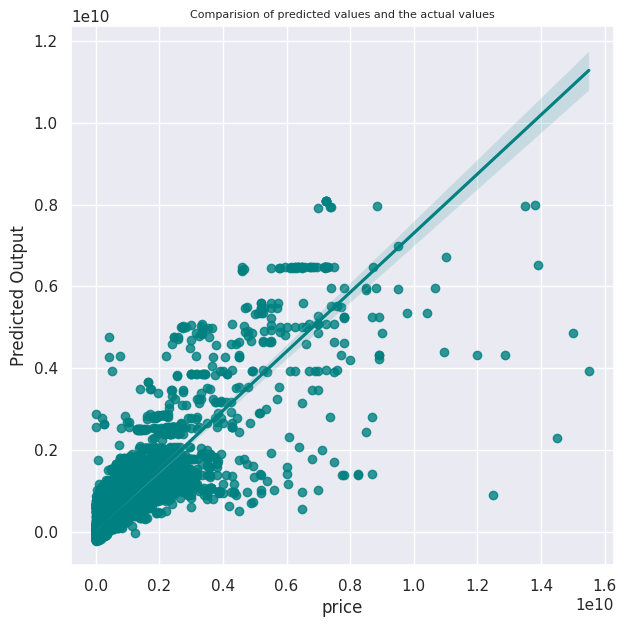

In [10]:
plt.figure(figsize = (7, 7))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 8)
plt.show()

## **2. K - Neighbors Regressor**

In [11]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)  # Changed y_test to x_test
y_predict = pd.DataFrame(y_predict, columns=['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis=1, ignore_index=False)

In [12]:
import joblib

# Save the trained model using joblib
filename = 'carprice_model.joblib'
joblib.dump(model, filename)

['carprice_model.joblib']

In [13]:
from sklearn import metrics

print("MAE data train:", metrics.mean_absolute_error(y_test,y_predict))
print("RMSE data train:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-squared train:", round(metrics.r2_score(y_test,y_predict),3))

MAE data train: 29797762.21498437
RMSE data train: 124271070.45251334
R-squared train: 0.883


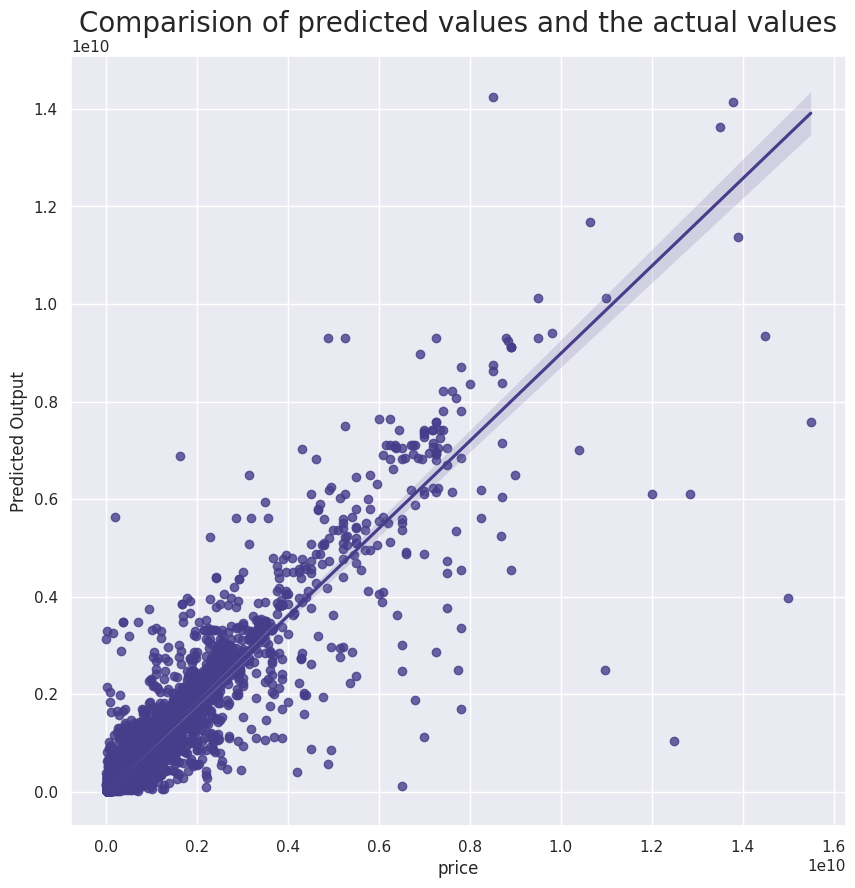

In [14]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

## **3. PLS Regression**

In [15]:
model = PLSRegression(n_components = 11)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

In [16]:
from sklearn import metrics

print("MAE data train:", metrics.mean_absolute_error(y_test,y_predict))
print("RMSE data train:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-squared train:", round(metrics.r2_score(y_test,y_predict),3))

MAE data train: 67902633.20367205
RMSE data train: 185630027.25018463
R-squared train: 0.739


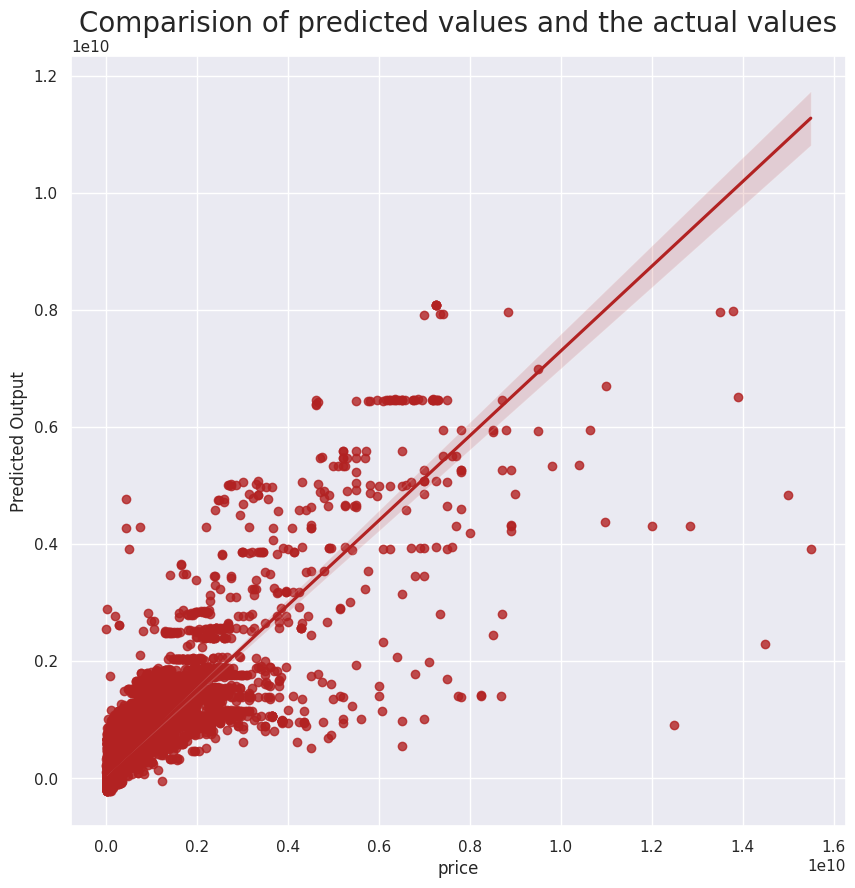

In [17]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()